In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import statsmodels.formula.api as smf 
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import influence_plot


C:\Users\91739\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r"C:\Users\91739\Downloads\50_Startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df = df.rename({'R&D Spend':'rd', 'Administration': 'adm', 'Marketing Spend' : 'mkt', 'State' : 'state', 'Profit' : 'profit'}, axis=1)
df.head()

,rd,adm,mkt,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rd      50 non-null     float64
 1   adm     50 non-null     float64
 2   mkt     50 non-null     float64
 3   state   50 non-null     object 
 4   profit  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
#creating a correlation matrix
df.corr()

,rd,adm,mkt,profit
rd,1.000000,0.241955,0.724248,0.972900
adm,0.241955,1.000000,-0.032154,0.200717
mkt,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


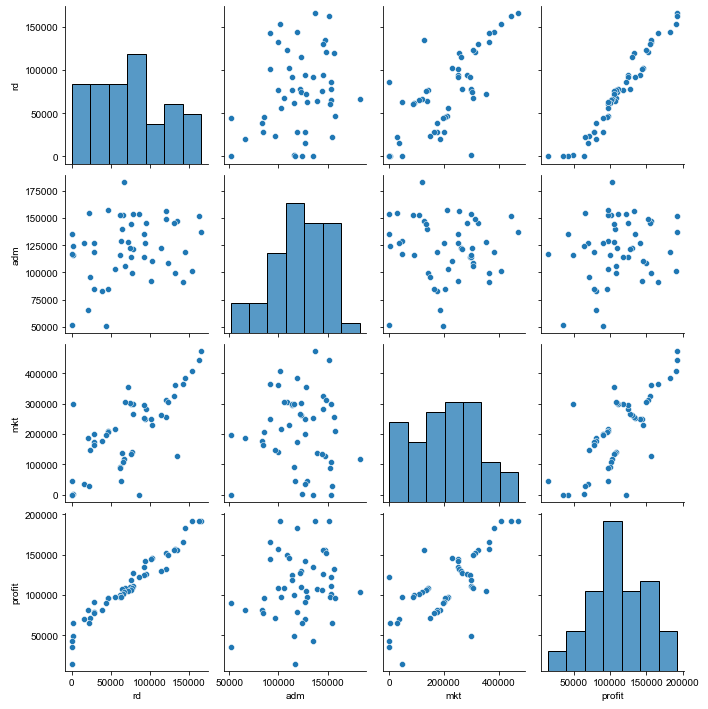

In [6]:
#creating a plot to visualize the correlation
sns.pairplot(df)
sns.set_style(style='darkgrid')
plt.show()

In [7]:
#Building a model
model = smf.ols('profit~rd+adm+mkt', data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.53e-30
Time:                        13:10:08   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd             0.8057      0.045     17.846      0.000       0.715       0.897
adm           -0.0268      0.051     -0.526      0.602      -0.130       0.076
mkt            0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
model.params

Intercept    50122.192990
rd               0.805715
adm             -0.026816
mkt              0.027228
dtype: float64

In [9]:
#creating a model with 'R&D' as it is having the highest correlation
ml_rd = smf.ols('profit~rd', data=df).fit()
ml_rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           3.50e-32
Time:                        13:10:08   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
print(ml_rd.tvalues, '\n', ml_rd.pvalues, '\n', ml_rd.params)

Intercept    19.320288
rd           29.151139
dtype: float64 
 Intercept    2.782697e-24
rd           3.500322e-32
dtype: float64 
 Intercept    49032.899141
rd               0.854291
dtype: float64


In [11]:
#creating a model with a market spend
ml_mkt = smf.ols('profit~mkt', data=df).fit()
ml_mkt.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           4.38e-10
Time:                        13:10:08   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mkt            0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
ml_mkt.params

Intercept    60003.548816
mkt              0.246459
dtype: float64

In [13]:
#calculating the VIF values for checking the multicollinearity among independent variables
rsq_rd = smf.ols('rd~adm+mkt', data=df).fit().rsquared
vif_rd = 1/(1-rsq_rd)
print(vif_rd)

2.4689030699947017


In [14]:
rsq_adm = smf.ols('adm~rd+mkt', data=df).fit().rsquared
vif_adm = 1/(1-rsq_adm)
print(vif_adm)

1.1750910070550453


In [15]:
rsq_mkt = smf.ols('mkt~rd+adm', data=df).fit().rsquared
vif_mkt = 1/(1-rsq_mkt)
print(vif_mkt)

2.3267732905308773


In [16]:
#storing vif values in a dataframe
d1 = {'Variables': ['rd','adm','mkt'], 'VIF': [vif_rd,vif_adm,vif_mkt]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,rd,2.468903
1,adm,1.175091
2,mkt,2.326773


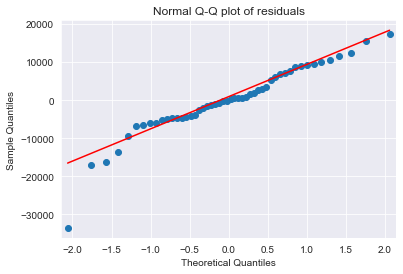

In [17]:
#RESIDUAl ANALYSIS
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [18]:
list(np.where(model.resid>10))

[array([ 1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 28, 30, 34, 35, 36,
        37, 38, 40, 41, 42, 43, 44, 45], dtype=int64)]

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

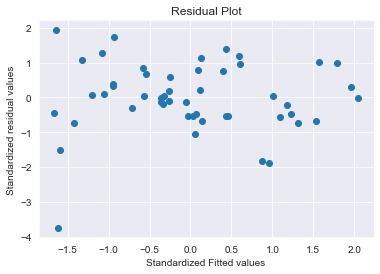

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

eval_env: 1


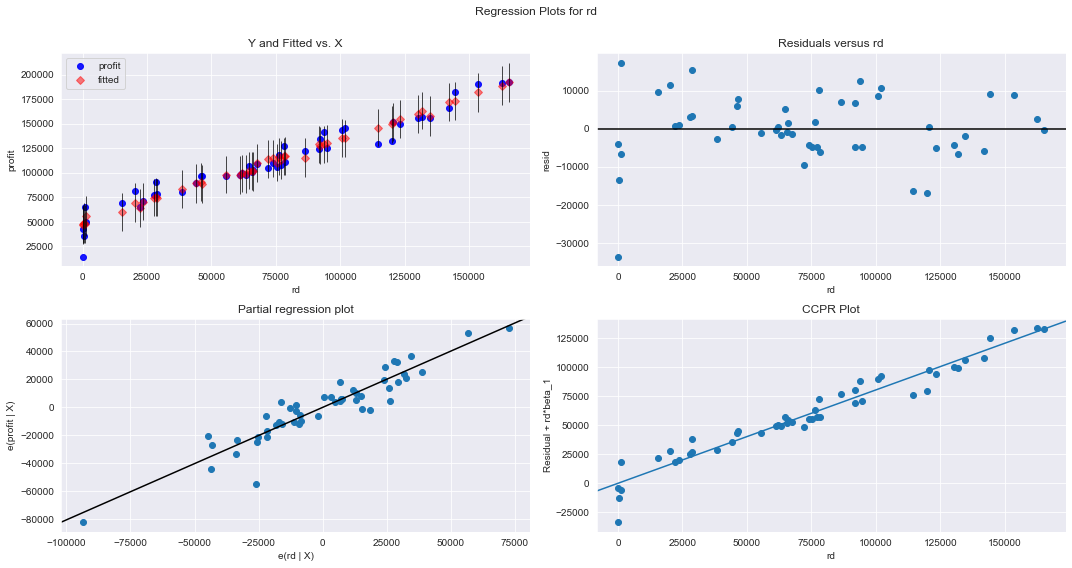

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd", fig=fig)
plt.show()

eval_env: 1


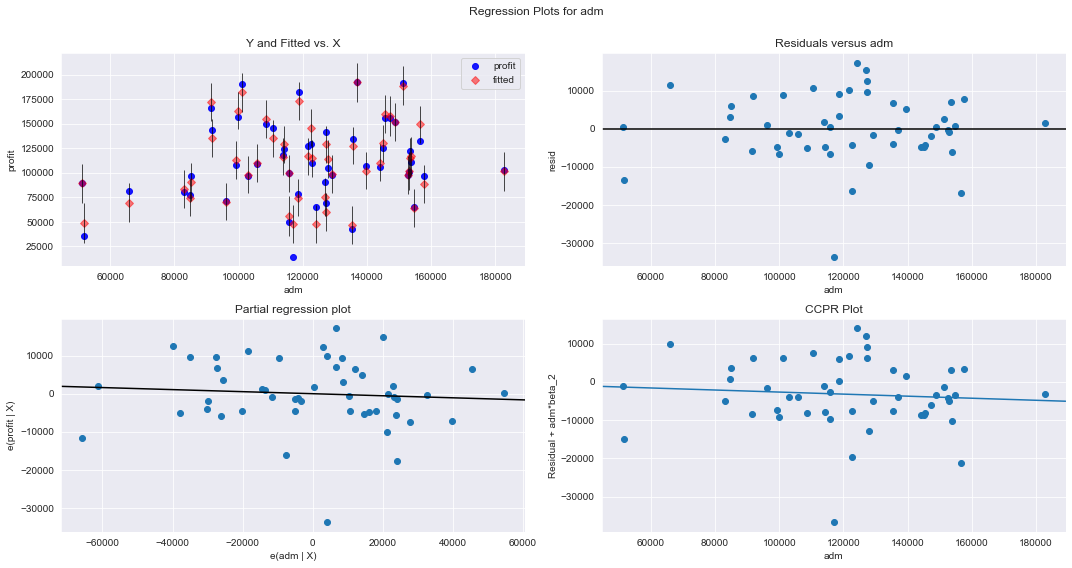

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "adm", fig=fig)
plt.show()

eval_env: 1


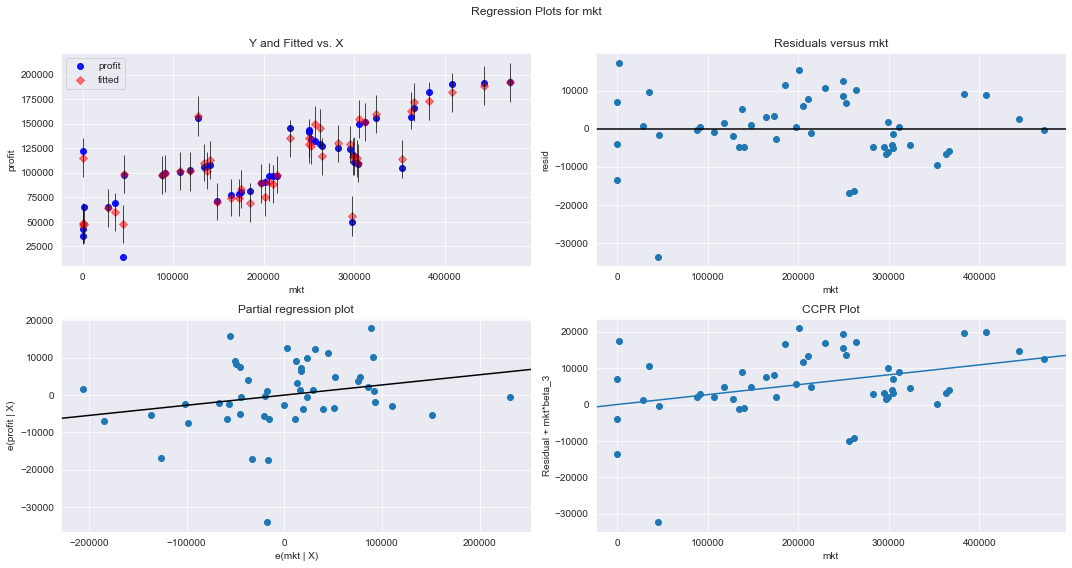

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mkt", fig=fig)
plt.show()

In [24]:
#Model deletion diagnostics
#cooks distance


In [25]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

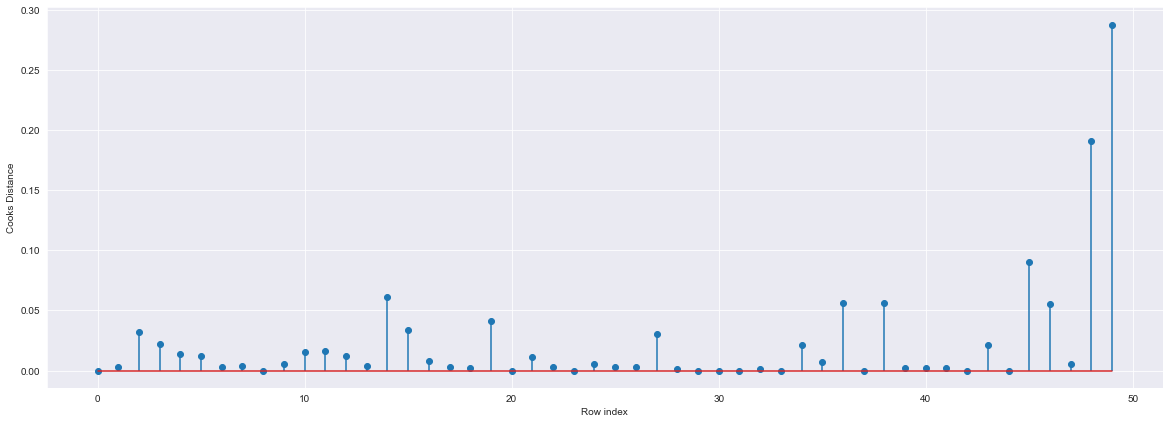

In [26]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [27]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.28808229275432673)

In [28]:
#New data for 'prediction
new_data=pd.DataFrame({'rd':165349.20,'adm':136897.80,'mkt':471784.10,'state':'New York'},index=[1])
new_data

,rd,adm,mkt,state
1,165349.2,136897.8,471784.1,New York


In [29]:
model.predict(new_data)

1    192521.25289
dtype: float64

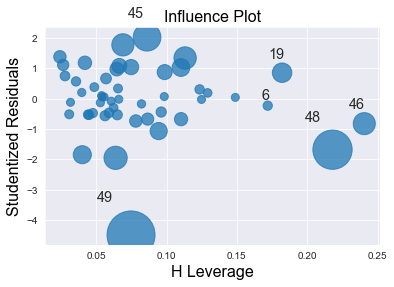

In [30]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [31]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k= df.shape[1]
n=df.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [32]:
df[df.index.isin([49])] 

,rd,adm,mkt,state,profit
49,0.0,116983.8,45173.06,California,14681.4


In [33]:
#Improving the Model


In [34]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
df2 =df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df2

,rd,adm,mkt,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


Model Deletion Diagnostics and Final Model

In [35]:
final_model = smf.ols('profit~rd+adm+mkt', data=df2).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Wed, 26 Jul 2023   Prob (F-statistic):           8.85e-32
Time:                        13:10:11   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
rd             0.7830      0.038     20.470      0.000       0.706       0.860
adm           -0.0222      0.043     -0.518      0.607      -0.109       0.064
mkt            0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [36]:
#Model predictions

In [37]:
# say New data for prediction is
new_data2=pd.DataFrame({'rd':165349.20,'adm':136897.80,'mkt':471784.10,'state':'New York'},index=[1])
new_data2

,rd,adm,mkt,state
1,165349.2,136897.8,471784.1,New York


In [38]:
final_model.predict(new_data2)

1    190716.676999
dtype: float64

In [39]:
# Automatic Prediction of Price with 90.02% accurcy
pred_y=final_model.predict(df2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [40]:
#table containing R^2 value for each prepared model
d2 ={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


In [43]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [44]:
df.head()

,rd,adm,mkt,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [55]:
x = df[['rd','adm','mkt']]
y= df[['profit']]

In [51]:
x

,rd,adm,mkt
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [56]:
y

,profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                    train_size=0.7,
                                                    random_state=123)

In [61]:
x_train.shape

(35, 3)

In [62]:
x_test.shape

(15, 3)

In [63]:
y_test

,profit
10,146121.95
13,134307.35
30,99937.59
46,49490.75
18,124266.90
0,192261.83
40,78239.91
12,141585.52
29,101004.64
8,152211.77


In [64]:
y_train

,profit
1,191792.06
6,156122.51
27,105008.31
49,14681.40
24,108552.04
31,97483.56
15,129917.04
35,96479.51
26,105733.54
7,155752.60


Ridge Regression

In [66]:
#applying ridge regression
alpha = 0.1
ridge = Ridge(alpha=alpha)
ridge.fit(x_train, y_train)

Ridge(alpha=0.1)

In [69]:
y_pred = ridge.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse: .2f}")

Mean squared error:  49629900.54


Lasso Regression

In [71]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [73]:
# Create the Lasso regression object and fit the model
lasso = Lasso(alpha=alpha)
lasso.fit(x_train, y_train)

Lasso(alpha=0.1)

In [74]:
# Set the regularization strength
alpha = 0.1

In [80]:
# Make predictions on the testing set
y_pred_lasso = lasso.predict(x_test)
y_pred_lasso

array([133719.8505481 , 127302.27191501,  97791.69184378,  60067.37369257,
       128697.70061871, 191989.89147556,  75874.84011701, 128555.33357768,
       101435.58283748, 151489.58691442, 119002.45578375,  47093.66929022,
       133490.69421612,  74657.14558527, 161867.97534252])

In [84]:
# Calculate the mean squared error
mse_l = mean_squared_error(y_test, y_pred_lasso)

In [85]:
# Print the mean squared error
print(f"Mean squared error: {mse_l:.2f}")

Mean squared error: 49629900.49


In [86]:
#table containing R^2 value for each prepared model
d2 ={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316


Insights
model with Rsquared value of 0.96 is the best model